<a href="https://colab.research.google.com/github/Kanishk-anand22/Google-DA-Capstone/blob/main/Crophealth_mon_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install earthengine-api geopandas rasterio folium matplotlib

!pip install earthengine-api
!pip install geopandas rasterio folium matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 30.9 MB/s eta 0:00:00


In [30]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [3]:
!earthengine authenticate

Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
W0112 13:08:54.476109 133034944876544 _default.py:683] No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=cSy4OLY5t2E-3rLlwPOj48QwQIPSRLUr7d8A9vYPdeo&tc=KwLvnGytK8_mDYRQpBdI6B-S7lKDsrEzBV_cj9rglHs&cc=6-jDtZX5OpnawrizODVnCV4seGRyQVC5zUYBEheMdGM

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AanRRrtZV1Thv2_abSyPtpVPir4E

In [4]:
import ee

# Initialise GEE
ee.Initialize()

# Define the time range for the analysis
start_date = '2023-01-01'
end_date = '2023-12-31'

# Define the coordinates for Rajasthan (Thar Desert, India)
rajasthan_roi = ee.Geometry.Polygon([
    [[69.3, 28.5], [71.5, 28.5], [71.5, 27.0], [69.3, 27.0]]
])

# Define the coordinates for Wadi Rum, Jordan
wadi_rum_roi = ee.Geometry.Polygon([
    [[35.0, 29.5], [36.0, 29.5], [36.0, 29.0], [35.0, 29.0]]
])

# Define the coordinates for Mauritania (Sahara Desert)
mauritania_roi = ee.Geometry.Polygon([
    [[-15.0, 20.5], [-10.0, 20.5], [-10.0, 18.5], [-15.0, 18.5]]
])

# Combine all ROIs into a dictionary for easier access later
rois = {
    'Rajasthan': rajasthan_roi,
    'Wadi Rum': wadi_rum_roi,
    'Mauritania': mauritania_roi
}

In [5]:
def get_ndvi_timeseries(roi, start_date='2023-01-01', end_date='2023-12-31'):
    # Filter Sentinel-2 images within the date range and the region of interest
    sentinel = ee.ImageCollection('COPERNICUS/S2') \
        .filterDate(start_date, end_date) \
        .filterBounds(roi) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

    # Calculate NDVI for each image in the collection
    def calculate_ndvi(image):
        ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
        return ndvi.copyProperties(image, ['system:time_start'])

    # Apply NDVI calculation to each image and retain properties
    ndvi_collection = sentinel.map(calculate_ndvi)
    return ndvi_collection

ndvi_rajasthan_ts = get_ndvi_timeseries(rois['Rajasthan'])
first_ndvi_image = ndvi_rajasthan_ts.first()
print(first_ndvi_image.getInfo())  # Ensure 'system:time_start' is in the properties


ndvi_rajasthan_ts = get_ndvi_timeseries(rois['Rajasthan'])
print(type(ndvi_rajasthan_ts))  # Should output <class 'ee.imagecollection.ImageCollection'>

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -1, 'max': 1}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32642', 'crs_transform': [10, 0, 499980, 0, -10, 3000000]}], 'properties': {'system:time_start': 1672726304826, 'system:footprint': {'type': 'LinearRing', 'coordinates': [[68.99969792943483, 27.122480901947892], [68.99969711080507, 27.12246964781965], [68.99969965765321, 26.13125830071895], [68.99974040722296, 26.131216878181135], [68.99977506254831, 26.131171179136626], [68.99979152610157, 26.13116835011973], [70.09788986325059, 26.126986467560048], [70.09793638010625, 26.127022662185873], [70.09798762132615, 26.127053401216372], [70.09799089204219, 26.1270681193701], [70.10268498832907, 26.622607104421164], [70.10750206365884, 27.118103258886432], [70.10746136201826, 27.118145023272188], [70.10742683830323, 27.1181910492706], [70.10741030326011, 27.118193954868858], [68.99979816609816, 27.122559594119146], [68.99975159516

In [6]:
# Step 4: Extract NDVI Time Series Data
def extract_ndvi_time_series(ndvi_image_collection, roi, region_name):
    # Get the NDVI values for each month (or time period of your choice)
    time_series_data = []

    # Function to calculate mean NDVI for a region
    def get_mean_ndvi(image):
        # Reduce the image to get the mean NDVI over the region
        mean_ndvi = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=30,  # The scale is typically 30m for Sentinel-2 data
            maxPixels=1e8,
            bestEffort=True
        ).get('NDVI')  # Extract NDVI value

        return image.set('mean_ndvi', mean_ndvi)

    # Map the function over the image collection
    ndvi_collection_with_mean = ndvi_image_collection.map(get_mean_ndvi)

    # Extract the time series (mean NDVI) values for each image
    for image in ndvi_collection_with_mean.getInfo()['features']:
        timestamp = image['properties']['system:time_start']  # Time in milliseconds
        mean_ndvi_value = image['properties']['mean_ndvi']  # Extracted NDVI value
        date = ee.Date(timestamp).format('YYYY-MM-dd').getInfo()  # Convert to readable date
        time_series_data.append((date, mean_ndvi_value))

    return time_series_data

# Generate NDVI time series collections for all regions
ndvi_rajasthan_ts = get_ndvi_timeseries(rois['Rajasthan'])
ndvi_wadi_rum_ts = get_ndvi_timeseries(rois['Wadi Rum'])
ndvi_mauritania_ts = get_ndvi_timeseries(rois['Mauritania'])

# Extract NDVI time series data for each region
ndvi_rajasthan_data = extract_ndvi_time_series(ndvi_rajasthan_ts, rois['Rajasthan'], 'Rajasthan')
ndvi_wadi_rum_data = extract_ndvi_time_series(ndvi_wadi_rum_ts, rois['Wadi Rum'], 'Wadi Rum')
ndvi_mauritania_data = extract_ndvi_time_series(ndvi_mauritania_ts, rois['Mauritania'], 'Mauritania')

# Print the extracted data
print("Rajasthan NDVI Data:", ndvi_rajasthan_data)
print("Wadi Rum NDVI Data:", ndvi_wadi_rum_data)
print("Mauritania NDVI Data:", ndvi_mauritania_data)


Rajasthan NDVI Data: [('2023-01-03', 0.0571528682505582), ('2023-01-03', 0.08904350940331406), ('2023-01-03', 0.21127189651250597), ('2023-01-03', 0.08412425767056388), ('2023-01-03', 0.08038440371105594), ('2023-01-03', 0.15010646731418345), ('2023-01-05', 0.07143832522259179), ('2023-01-05', 0.09006053161478839), ('2023-01-05', 0.09474159580074244), ('2023-01-05', 0.11867677901335016), ('2023-01-05', 0.09201904714032828), ('2023-01-05', 0.09473918554341637), ('2023-01-05', 0.07955887487126417), ('2023-01-08', 0.05784398221304592), ('2023-01-08', 0.09389581434632471), ('2023-01-08', 0.07968826916914191), ('2023-01-08', 0.0805212207394619), ('2023-01-10', 0.061318993989123244), ('2023-01-10', 0.07835409640227294), ('2023-01-10', 0.08359116169784432), ('2023-01-10', 0.10178895793862114), ('2023-01-10', 0.08137996433563573), ('2023-01-10', 0.08585361970032766), ('2023-01-10', 0.06794495584403319), ('2023-01-15', 0.06910782655423292), ('2023-01-15', 0.06503784614880372), ('2023-01-15', 0.

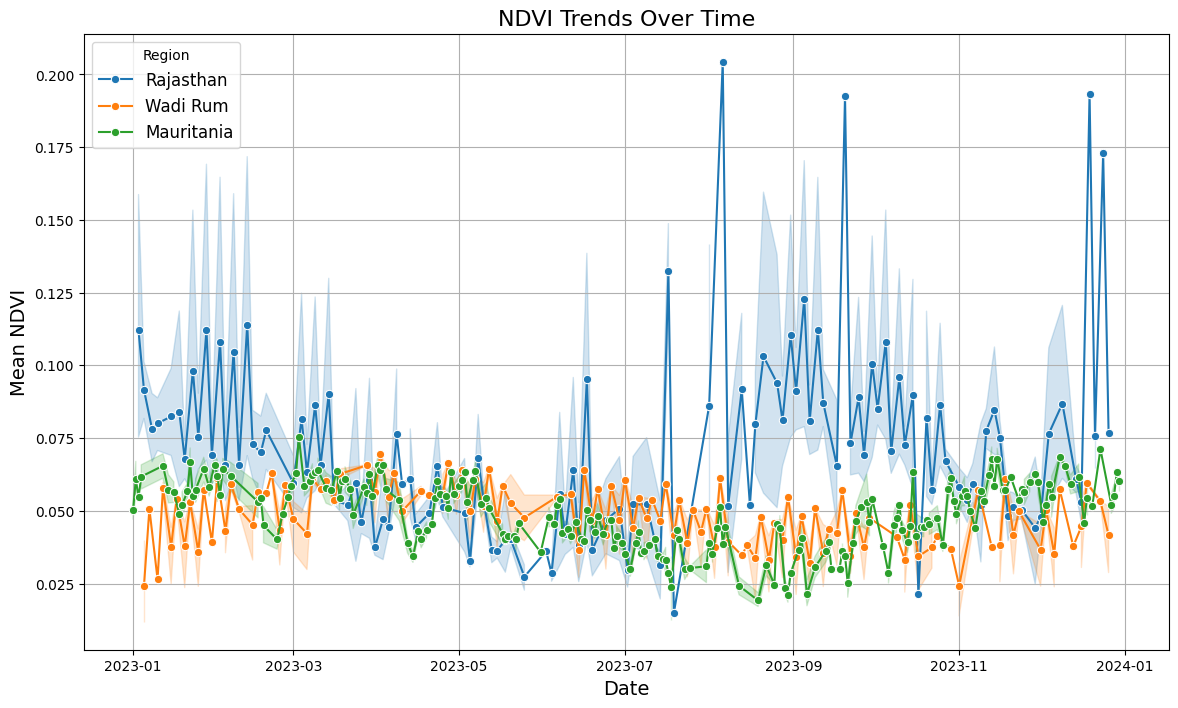

In [7]:
#Step 5: Visualize NDVI Time Series
import pandas as pd

# Convert the extracted NDVI data into a Pandas DataFrame
def ndvi_data_to_dataframe(ndvi_data, region_name):
    df = pd.DataFrame(ndvi_data, columns=['Date', 'NDVI'])
    df['Region'] = region_name
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Create DataFrames for each region
rajasthan_df = ndvi_data_to_dataframe(ndvi_rajasthan_data, 'Rajasthan')
wadi_rum_df = ndvi_data_to_dataframe(ndvi_wadi_rum_data, 'Wadi Rum')
mauritania_df = ndvi_data_to_dataframe(ndvi_mauritania_data, 'Mauritania')

# Combine all regions into a single DataFrame
combined_df = pd.concat([rajasthan_df, wadi_rum_df, mauritania_df], ignore_index=True)

# Display the first few rows
# print(combined_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot NDVI trends for each region
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Date', y='NDVI', hue='Region', marker='o')

# Customize the plot
plt.title('NDVI Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean NDVI', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.grid(True)
plt.show()


In [8]:
# Descriptive statistics for NDVI
stats = combined_df.groupby('Region')['NDVI'].describe()
print(stats)


             count      mean       std       min       25%       50%  \
Region                                                                 
Mauritania  1269.0  0.048794  0.012845  0.011597  0.039803  0.049577   
Rajasthan    620.0  0.070128  0.037871  0.014885  0.045997  0.063324   
Wadi Rum     265.0  0.047237  0.011921  0.011872  0.040128  0.049417   

                 75%       max  
Region                          
Mauritania  0.058098  0.076641  
Rajasthan   0.081390  0.246609  
Wadi Rum    0.055863  0.069691  


In [9]:
# Aggregate NDVI for duplicates
combined_df = combined_df.groupby(['Date', 'Region'], as_index=False).mean()

# Pivot DataFrame to compute correlations
pivot_df = combined_df.pivot(index='Date', columns='Region', values='NDVI')

# Compute correlation matrix
correlation_matrix = pivot_df.corr()
print(correlation_matrix)


Region      Mauritania  Rajasthan  Wadi Rum
Region                                     
Mauritania    1.000000  -0.600471  0.170308
Rajasthan    -0.600471   1.000000 -0.443830
Wadi Rum      0.170308  -0.443830  1.000000


In [17]:
#Step 8
# Load CHIRPS dataset for rainfall data
chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY") \
    .filterDate('2023-01-01', '2023-12-31')

# Function to calculate mean rainfall for a region
def calculate_mean_rainfall(image, roi):
    mean_rainfall = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=roi,
        scale=5000,  # Coarser scale for rainfall data
        maxPixels=1e8,
        bestEffort=True
    ).get('precipitation')  # Rainfall band
    return image.set('mean_rainfall', mean_rainfall)

# Function to extract rainfall time series for a given ROI and region name
def extract_rainfall_time_series(region_roi, region_name):
    # Filter CHIRPS data for the specific region
    chirps_filtered = chirps.filterBounds(region_roi)

    # Map the calculation of mean rainfall over the collection
    rainfall_time_series = chirps_filtered.map(lambda image: calculate_mean_rainfall(image, region_roi))

    # Extract rainfall data and dates
    rainfall_data = rainfall_time_series.aggregate_array('mean_rainfall').getInfo()
    dates = rainfall_time_series.aggregate_array('system:time_start').getInfo()

    # Convert to a Pandas DataFrame
    return pd.DataFrame({
        'Date': pd.to_datetime(dates, unit='ms'),
        'Rainfall': rainfall_data,
        'Region': region_name
    })

# Extract rainfall data for each region
rainfall_rajasthan = extract_rainfall_time_series(rois['Rajasthan'], 'Rajasthan')
rainfall_wadi_rum = extract_rainfall_time_series(rois['Wadi Rum'], 'Wadi Rum')
rainfall_mauritania = extract_rainfall_time_series(rois['Mauritania'], 'Mauritania')

# Combine rainfall data for all regions
rainfall_df = pd.concat([rainfall_rajasthan, rainfall_wadi_rum, rainfall_mauritania], ignore_index=True)
print(rainfall_df.head())

        Date  Rainfall     Region
0 2023-01-01       0.0  Rajasthan
1 2023-01-02       0.0  Rajasthan
2 2023-01-03       0.0  Rajasthan
3 2023-01-04       0.0  Rajasthan
4 2023-01-05       0.0  Rajasthan


In [18]:
#Step 9
# Combine NDVI and Rainfall DataFrames
merged_df = pd.merge(combined_df, rainfall_df, on=['Date', 'Region'], how='inner')

# Display the first few rows of the combined dataset
print("Merged NDVI and Rainfall Data:")
print(merged_df.head())


Merged NDVI and Rainfall Data:
        Date      Region      NDVI  Rainfall
0 2023-01-01  Mauritania  0.050334       0.0
1 2023-01-02  Mauritania  0.060807       0.0
2 2023-01-03  Mauritania  0.054632       0.0
3 2023-01-03   Rajasthan  0.112014       0.0
4 2023-01-04  Mauritania  0.061765       0.0


In [19]:
#Step 10
# Correlation analysis for each region
correlation_by_region = merged_df.groupby('Region').apply(
    lambda group: group[['NDVI', 'Rainfall']].corr().iloc[0, 1]
)

# Display correlation results
print("\nCorrelation between NDVI and Rainfall by Region:")
print(correlation_by_region)



Correlation between NDVI and Rainfall by Region:
Region
Mauritania   -0.435190
Rajasthan    -0.187942
Wadi Rum      0.173466
dtype: float64


<ipython-input-19-345e5fb8cfb1>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_region = merged_df.groupby('Region').apply(


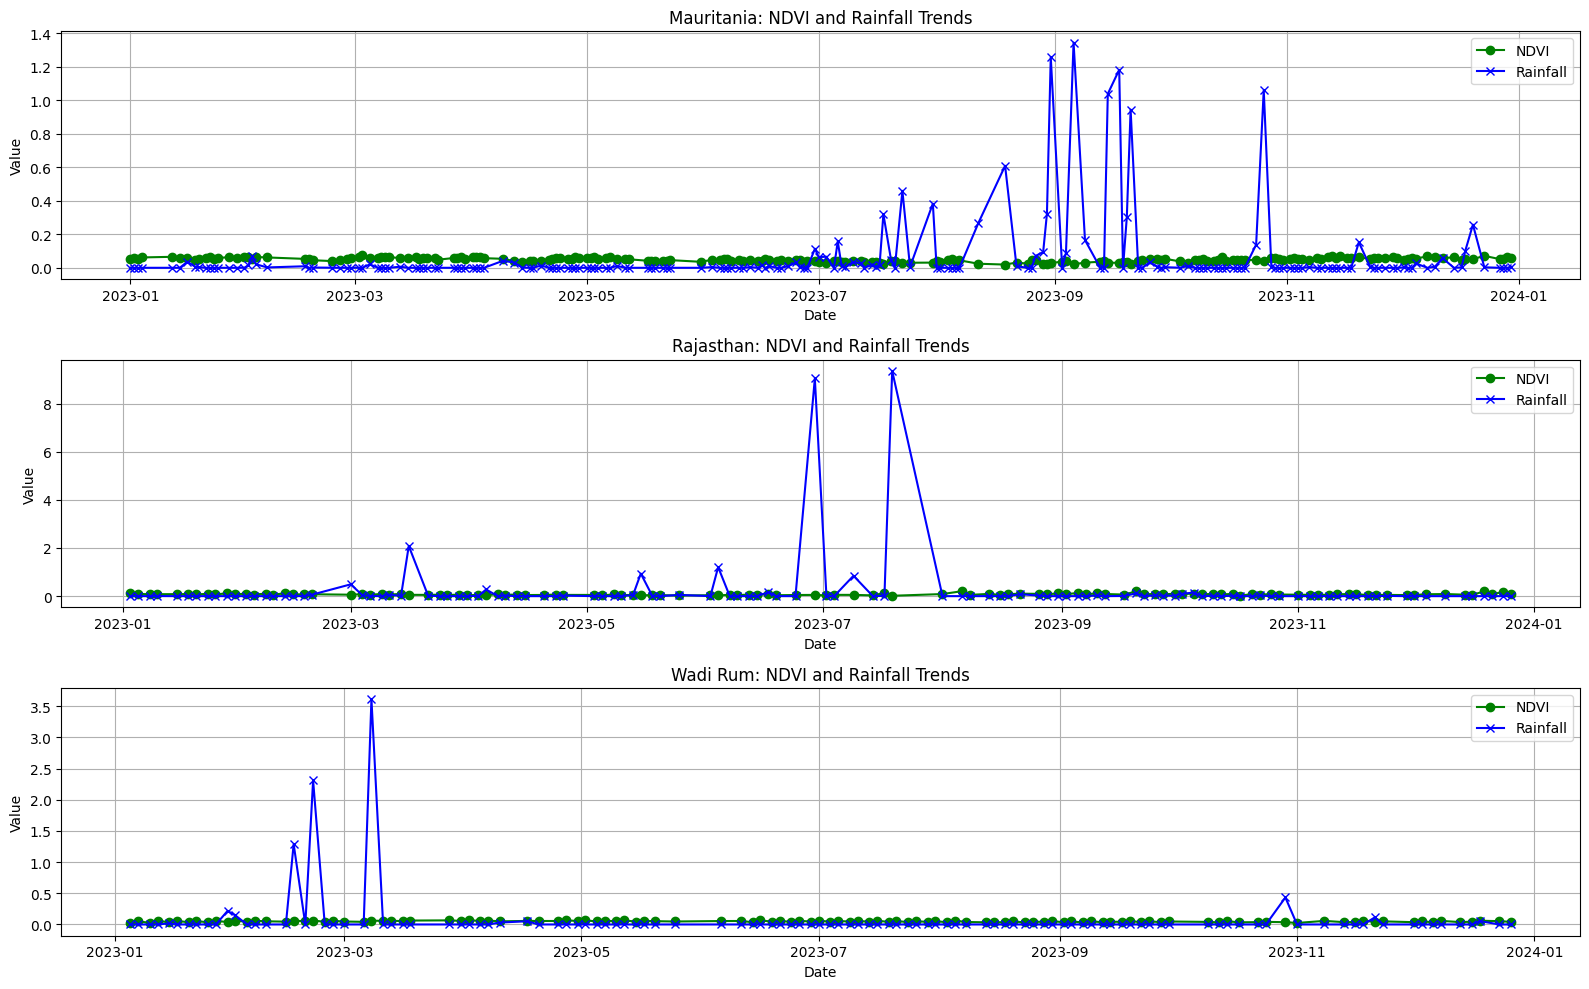

In [20]:
#Step 11
# Import visualization libraries
import matplotlib.pyplot as plt

# Plot NDVI and Rainfall Trends for each region
regions = merged_df['Region'].unique()

plt.figure(figsize=(16, 10))
for i, region in enumerate(regions, 1):
    plt.subplot(3, 1, i)
    region_data = merged_df[merged_df['Region'] == region]
    plt.plot(region_data['Date'], region_data['NDVI'], label='NDVI', color='green', marker='o')
    plt.plot(region_data['Date'], region_data['Rainfall'], label='Rainfall', color='blue', marker='x')
    plt.title(f"{region}: NDVI and Rainfall Trends")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [21]:
# Export the merged dataset to a CSV file
# output_file = 'ndvi_rainfall_combined.csv'
# merged_df.to_csv(output_file, index=False)

# print(f"Dataset successfully exported as '{output_file}'.")


Dataset successfully exported as 'ndvi_rainfall_combined.csv'.


In [33]:
import streamlit as st
import plotly.express as px

# Load the data
df = merged_df

# Streamlit App
st.title('NDVI and Rainfall Analysis')

# Interactive Plot
fig = px.line(df, x='Date', y='NDVI', color='Region', title='NDVI Trends Over Time')
st.plotly_chart(fig)

2025-01-12 16:10:36.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 16:10:36.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 16:10:36.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 16:10:36.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 16:10:36.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 16:10:36.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()